<a href="https://colab.research.google.com/github/Priyali28/Priyali28/blob/main/1_Matplotlib_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Use Matplotlib package to create visualizations

Aim: Using Google Cloud and Python, I want to quantify my life's transition by synchronizing and visualizing a "temperature gap" analysis that contrasts the consistent warmth of my birthplace, Ahmedabad, with the volatile climate of my new home in Chicago

### Methodology: Data Acquisition & Setup

* **Source Selection:** Utilized the [Google Cloud Public Datasets](https://cloud.google.com/datasets) inventory to access high-volume, verified environmental data.
* **Dataset Identification:** Selected the **GSOD (Global Summary of the Day)** dataset, featuring daily global weather variables (temperature, wind, precipitation) from 1929 to present. [View Dataset in Marketplace](https://console.cloud.google.com/marketplace/product/noaa-public/gsod).
* **Data Pipeline:** Employed the `google-cloud-bigquery` library to execute SQL queries directly against the source, extracting targeted samples into a **Pandas DataFrame** for visualization.
* **Visualization Engine:** Leveraged the **Matplotlib** library to transform raw time-series data into comparative climate profiles.


Step 1: Install Google Cloud BigQuery

In [1]:
#Prerequisite: Install Google Cloud BigQuery if you're using Jupyter
# Its pre-installed in Gemini
!pip install google-cloud-bigquery pandas matplotlib db-dtypes

Step 2: Authentication

In [2]:
# Click on GSOD link --> view dataset--> create project
# Once the project is created you will get a unique project id and you can punch it below
# https://console.cloud.google.com/bigquery?project=abiding-robot-487518-s9&supportedpurview=project

from google.colab import auth
auth.authenticate_user()
print('Authenticated successfully!')

from google.cloud import bigquery
import pandas as pd

# Initialize the client
# Replace 'your-project-id' with your actual GCP project ID
client = bigquery.Client(project='abiding-robot-487518-s9')

Authenticated successfully!


Step 3: Explore the dataset on the website

In [3]:
# Metadata table
# Where is the metadata table located?
# In the explorer pan on the left side, there is a 'stations' table at the bottom
# 'name' field gives us city name

query1 = """
SELECT usaf, name, country, state
FROM `bigquery-public-data.noaa_gsod.stations`
WHERE name LIKE '%AHMEDABAD%'
   OR name LIKE '%CHICAGO%'
"""
df1 = client.query(query1).to_dataframe()
df1.head(35)

#Ahmedabad is 426470, Chicago o'hare is 725300

,usaf,name,country,state
0,719573,LITTLE CHICAGO,CA,None
1,725344,CHICAGO / CALUMET COAST GUARD,US,None
2,725346,CHICAGO/MEIGS,US,IL
3,725346,CHICAGO/MEIGS,US,IL
4,998497,FOSTER AVE CHICAGO,US,IL
5,999999,CHICAGO MEIGS FIELD,US,IL
6,724958,PORT CHICAGO,US,CA
7,999999,CHICAGO MIDWAY AP,US,IL
8,999999,CHICAGO OHARE INTL AP,US,IL
9,725337,GARY CHICAGO,US,IN


Step 4: Bring in the data

In [35]:
# Run the GSOD query
# Run this to pull a small sample of weather data into a Pandas DataFrame (df)

#This is not a comment- its a string literal

query = """
SELECT * FROM `bigquery-public-data.noaa_gsod.gsod2025` #full address: Project.Dataset.Table
WHERE stn IN ('722530', '426470')  -- Chicago (O'Hare) and Ahmedabad
ORDER BY mo, da
"""

df = client.query(query).to_dataframe()

Step 5: Explore the data

In [36]:
df.head()

,stn,wban,date,year,mo,da,temp,count_temp,dewp,count_dewp,...,flag_min,prcp,flag_prcp,sndp,fog,rain_drizzle,snow_ice_pellets,hail,thunder,tornado_funnel_cloud
0,426470,99999,2025-01-01,2025,01,01,69.1,24,55.4,24,...,None,0.0,I,999.9,0,0,0,0,0,0
1,722530,12921,2025-01-01,2025,01,01,53.6,24,34.7,24,...,None,0.0,G,999.9,0,0,0,0,0,0
2,426470,99999,2025-01-02,2025,01,02,70.5,24,53.5,24,...,None,0.0,I,999.9,0,0,0,0,0,0
3,722530,12921,2025-01-02,2025,01,02,54.2,24,39.5,24,...,None,0.0,G,999.9,0,0,0,0,0,0
4,426470,99999,2025-01-03,2025,01,03,70.7,24,52.1,24,...,None,0.0,I,999.9,0,0,0,0,0,0


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 474 entries, 0 to 473
Data columns (total 33 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   stn                   474 non-null    object 
 1   wban                  474 non-null    object 
 2   date                  474 non-null    dbdate 
 3   year                  474 non-null    object 
 4   mo                    474 non-null    object 
 5   da                    474 non-null    object 
 6   temp                  474 non-null    float64
 7   count_temp            474 non-null    Int64  
 8   dewp                  474 non-null    float64
 9   count_dewp            474 non-null    Int64  
 10  slp                   474 non-null    float64
 11  count_slp             474 non-null    Int64  
 12  stp                   474 non-null    float64
 13  count_stp             474 non-null    Int64  
 14  visib                 474 non-null    float64
 15  count_visib           4

In [38]:
#9999.9 is the placeholder for missing values
df.describe()

,temp,count_temp,dewp,count_dewp,slp,count_slp,stp,count_stp,visib,count_visib,gust,max,min,prcp,sndp
count,474.000000,474.0,474.000000,474.0,474.000000,474.0,474.000000,474.0,474.000000,474.0,474.000000,474.000000,474.000000,474.000000,4.740000e+02
mean,77.204641,23.453586,59.015190,23.451477,5146.846203,11.639241,978.640084,11.814346,5.958228,23.453586,387.923207,90.051899,66.906751,1.785907,9.999000e+02
std,12.531013,2.633127,14.856429,2.633089,4483.138800,11.294942,119.892863,11.842667,3.754280,2.633127,472.958650,12.568899,13.769326,12.887396,8.194100e-12
min,28.700000,5.0,8.600000,5.0,998.900000,0.0,0.000000,0.0,0.400000,5.0,14.000000,37.900000,21.000000,0.000000,9.999000e+02
25%,72.200000,24.0,49.025000,24.0,1013.425000,0.0,986.200000,0.0,2.400000,24.0,20.000000,85.375000,59.800000,0.000000,9.999000e+02
50%,81.050000,24.0,64.750000,24.0,1023.750000,8.0,999.650000,9.5,3.000000,24.0,28.000000,92.500000,71.500000,0.000000,9.999000e+02
75%,84.975000,24.0,70.900000,24.0,9999.900000,24.0,999.900000,24.0,10.000000,24.0,999.900000,99.000000,77.000000,0.000000,9.999000e+02
max,94.600000,24.0,76.800000,24.0,9999.900000,24.0,999.900000,24.0,10.000000,24.0,999.900000,110.800000,84.200000,99.990000,9.999000e+02


In [39]:
# Shows you how many empty cells are in each column
print(df.isnull().sum())

stn                       0
wban                      0
date                      0
year                      0
mo                        0
da                        0
temp                      0
count_temp                0
dewp                      0
count_dewp                0
slp                       0
count_slp                 0
stp                       0
count_stp                 0
visib                     0
count_visib               0
wdsp                      0
count_wdsp                0
mxpsd                     0
gust                      0
max                       0
flag_max                221
min                       0
flag_min                305
prcp                      0
flag_prcp                 8
sndp                      0
fog                       0
rain_drizzle              0
snow_ice_pellets          0
hail                      0
thunder                   0
tornado_funnel_cloud      0
dtype: int64


Step 6: Begin visualizing

New Chicago count: 235
Ahmedabad count: 235


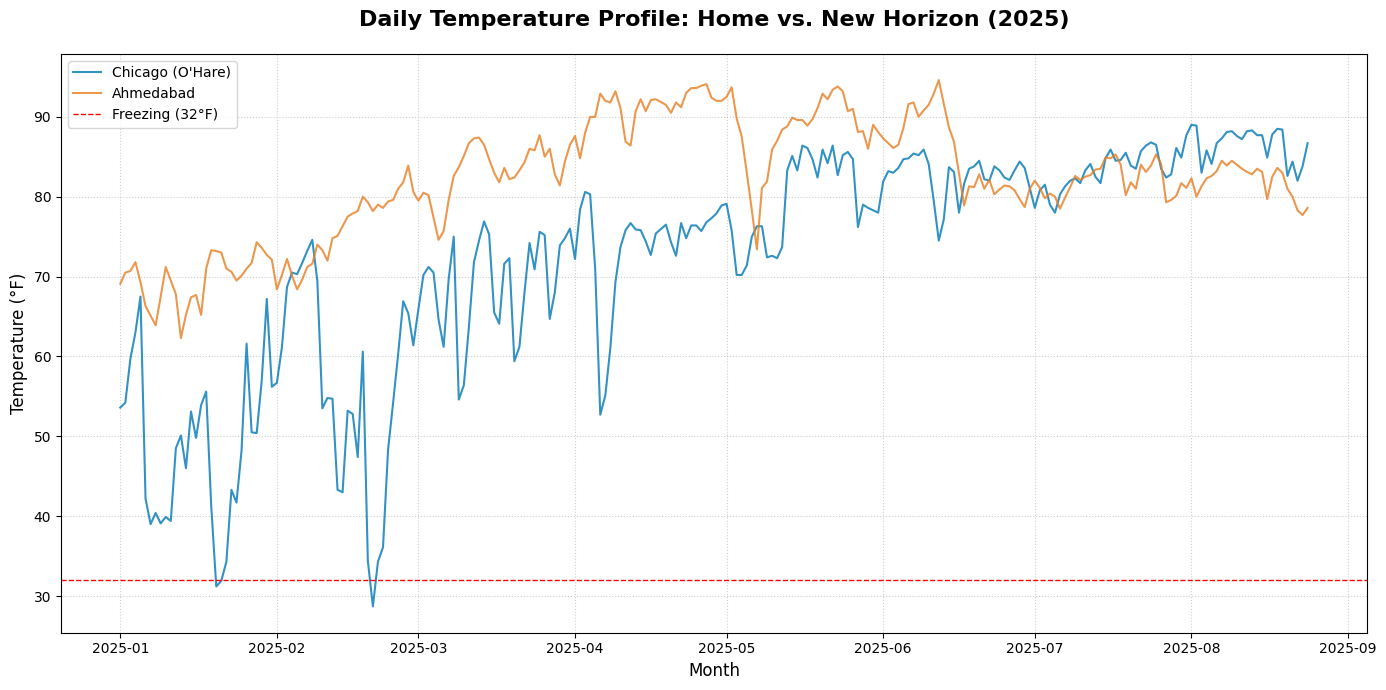

In [50]:
import matplotlib.pyplot as plt #package.module
import pandas as pd

# 1. Ensure the date column is in a proper format for the X-axis
# If you haven't created date_dt yet:
# creating new column date_dt by using to_datetime to fuse year mo da columns and renaming them too
df['date_dt'] = pd.to_datetime(df[['year', 'mo', 'da']].rename(columns={'mo': 'month', 'da': 'day'}))

# 2. Split the data
# If your data is out of order (e.g., January 5th comes before January 1st), your line chart will look like a "scribble"
# sort_valyes by date_dt ensures the line moves forward in time
# label: This doesn't show up on the chart yet, but it tells the "Legend" what to name this line later
# alpha=0.8: This makes the line 20% transparent, which makes the chart look "cleaner" and professional

chicago_df = df[df['stn'] == '722530'].sort_values('date_dt')
abad_df = df[df['stn'] == '426470'].sort_values('date_dt')

# Chicago has 239 values and Ahmedabad has 235 so some of the visualizations might give an error
# Filter Chicago to only keep dates that exist in Ahmedabad's date list

chicago_df = chicago_df[chicago_df['date'].isin(abad_df['date'])]

# Verify the count

print(f"New Chicago count: {len(chicago_df)}")
print(f"Ahmedabad count: {len(abad_df)}")

# 3. Create the Visualization
# figure creates an empty figure
# Use figsize so that the viz is big and doesn't look squished
# figsize is a parameter used to specify a tuple with width and height of a figure in inches

plt.figure(figsize=(14, 7))

# Plotting the lines

plt.plot(chicago_df['date_dt'], chicago_df['temp'], label='Chicago (O\'Hare)', color='#0077b6', linewidth=1.5, alpha=0.8)
plt.plot(abad_df['date_dt'], abad_df['temp'], label='Ahmedabad', color='#e67e22', linewidth=1.5, alpha=0.8)

# Adding a 'Freezing Line' for context
# axhline: Short for "Axis Horizontal Line" It draws a straight line all the way across the chart at the value you choose (y=32)
# This provides "context"—anything below this line is freezing

plt.axhline(y=32, color='red', linestyle='--', linewidth=1, label='Freezing (32°F)')

# Styling the Chart
# pad=20: Gives the title some "breathing room" above the chart
# plt.grid: Adds the dotted lines in the background, making it easier for the eye to track a specific date to a specific temperature

plt.title('Daily Temperature Profile: Home vs. New Horizon (2025)', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Temperature (°F)', fontsize=12)
plt.legend(loc='upper left', frameon=True)
plt.grid(True, linestyle=':', alpha=0.6)

# Final touch: Tight layout so nothing gets cut off
# plt.legend(): This looks at all your label= tags from earlier and builds the little box that explains which color is which city
# plt.tight_layout(): This automatically adjusts the margins so your axis labels (like "Month") don't get cut off at the bottom of the image

plt.tight_layout()
plt.show()

Daily temperatures jump up and down. To see the true seasonal trend, we calculate a 7-day rolling mean. This is a form of low-pass filtering—it removes the high-frequency "noise" (random cold fronts) to show the low-frequency "signal" (the change of seasons).

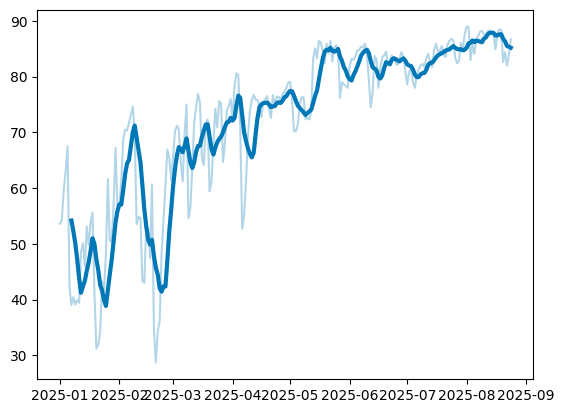

In [41]:
# Create a 7-day rolling average
# .rolling(window=7): It groups the current row with the previous 6 rows (a 7-day window)
# .mean: It takes the 7 values in the current "window" and spits out a single average
# The Result: A "Smoothed" line. The first 6 days of your dataset will be NaN because they don't have enough previous days to fill a 7-day window

chicago_df['temp_smooth'] = chicago_df['temp'].rolling(window=7).mean()
abad_df['temp_smooth'] = abad_df['temp'].rolling(window=7).mean()

# In your plot, use a thicker line for 'temp_smooth'
# and a thinner, lighter line for the original 'temp'
plt.plot(chicago_df['date_dt'], chicago_df['temp'], alpha=0.3, color='#0077b6')
plt.plot(chicago_df['date_dt'], chicago_df['temp_smooth'], color='#0077b6', linewidth=3, label='Chicago (7-Day Avg)')

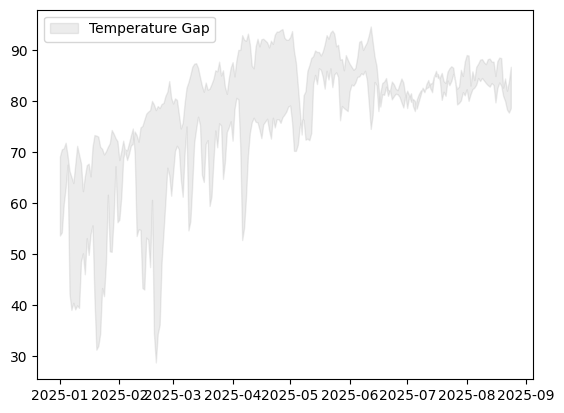

In [45]:
# This shades the area between the two lines to show the 'experience gap'
# plt.fill_between(): This function paints a color between two boundaries
# Arguments: (x_axis, line_1, line_2, color, alpha)
# What it does: It looks at the date on the X-axis, finds the temperature for Chicago and Ahmedabad, and colors everything in the middle.

# Use the date from either DF as the X-axis
# Use the 'temp' column from each specific DF as the boundaries
plt.fill_between(chicago_df['date_dt'],
                 chicago_df['temp'],
                 abad_df['temp'],
                 color='gray',
                 alpha=0.15,
                 label='Temperature Gap')

plt.legend()
plt.show()

In [43]:
# Calculate the daily difference
# We subtract Chicago temp from Ahmedabad temp
df_diff = abad_df.set_index('date_dt')['temp'] - chicago_df.set_index('date_dt')['temp']

# Find the date where the difference was the LARGEST
max_diff_date = df_diff.idxmax()
max_diff_value = df_diff.max()

print(f"The largest gap was on {max_diff_date.date()} with a difference of {max_diff_value:.1f}°F")

The largest gap was on 2025-02-20 with a difference of 49.5°F


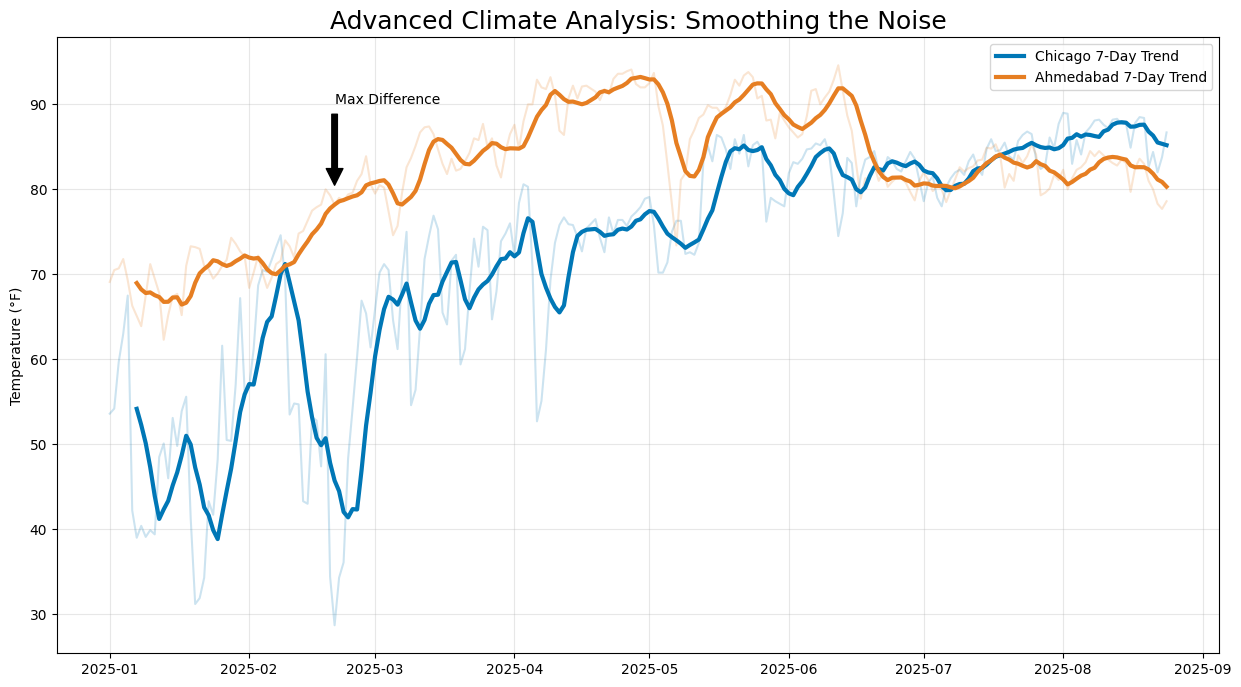

In [44]:
plt.figure(figsize=(15, 8))

# 1. Plot Raw Data with low opacity (The 'Noise')
plt.plot(chicago_df['date_dt'], chicago_df['temp'], color='#0077b6', alpha=0.2)
plt.plot(abad_df['date_dt'], abad_df['temp'], color='#e67e22', alpha=0.2)

# 2. Plot 7-Day Rolling Mean (The 'Signal')
plt.plot(chicago_df['date_dt'], chicago_df['temp'].rolling(7).mean(),
         color='#0077b6', linewidth=3, label='Chicago 7-Day Trend')
plt.plot(abad_df['date_dt'], abad_df['temp'].rolling(7).mean(),
         color='#e67e22', linewidth=3, label='Ahmedabad 7-Day Trend')

# 3. Add Annotation for the 'Greatest Gap'
# plt.annotate(): This is the "Presenter's Tool." It’s used to point out a specific discovery
#xy: The exact coordinates (Date, Temperature) where the arrow points
#xytext: Where the actual text label should sit
#arrowprops: A "dictionary" (a list of settings) that tells Matplotlib to draw an arrow, what color it should be, and how much to "shrink" it so it doesn't overlap the text
#pd.to_datetime('2023-01-15'): What it does: Converts a simple string of text into a high-precision Timestamp
#why we use it here: Since your X-axis is made of official "Dates," you can't just tell the computer to point to "January."
#You have to give it a Date object that matches the type of data on the axis

plt.annotate('Max Difference', xy=(pd.to_datetime('2025-02-20'), 80),
             xytext=(pd.to_datetime('2025-02-20'), 90),
             arrowprops=dict(facecolor='black', shrink=0.05))

plt.title('Advanced Climate Analysis: Smoothing the Noise', fontsize=18)
plt.ylabel('Temperature (°F)')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

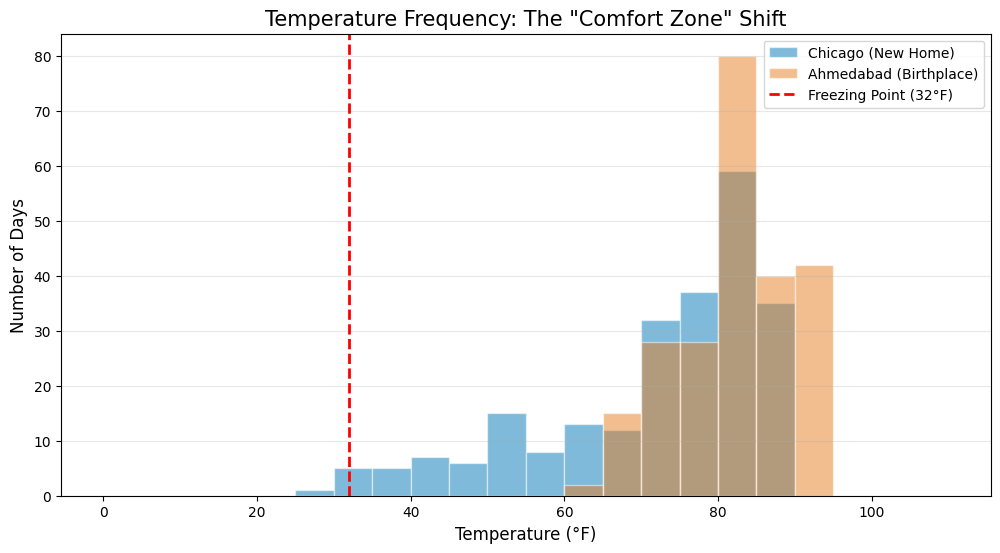

In [46]:
#Create a Histogram to show how many days in Chicago were spent in "The Danger Zone" (below 32°F) compared to Ahmedabad

plt.figure(figsize=(12, 6))

# Define bins so both cities use the same temperature "buckets"
# This covers everything from 0°F to 110°F in 5-degree steps
bins = range(0, 115, 5)

# Plotting the distributions
plt.hist(chicago_df['temp'], bins=bins, alpha=0.5, label='Chicago (New Home)', color='#0077b6', edgecolor='white')
plt.hist(abad_df['temp'], bins=bins, alpha=0.5, label='Ahmedabad (Birthplace)', color='#e67e22', edgecolor='white')

# Adding the 'Danger Zone' line at freezing
plt.axvline(x=32, color='red', linestyle='--', linewidth=2, label='Freezing Point (32°F)')

# Styling
plt.title('Temperature Frequency: The "Comfort Zone" Shift', fontsize=15)
plt.xlabel('Temperature (°F)', fontsize=12)
plt.ylabel('Number of Days', fontsize=12)
plt.legend()
plt.grid(axis='y', alpha=0.3)

plt.show()

In [47]:
# Calculate the daily difference (Ahmedabad - Chicago)
# This tells us how many degrees 'warmer' Ahmedabad was each day

daily_diff = abad_df['temp'].values - chicago_df['temp'].values

# Sum the differences to get the total cumulative gap
total_heat_gap = daily_diff.sum()

# Calculate the average daily difference for extra context
avg_diff = daily_diff.mean()

print(f"Total Cumulative Heat Gap: {total_heat_gap:,.1f}°F")
print(f"On average, Ahmedabad was {avg_diff:.1f}°F warmer than Chicago every day.")

Total Cumulative Heat Gap: 2,357.2°F
On average, Ahmedabad was 10.0°F warmer than Chicago every day.


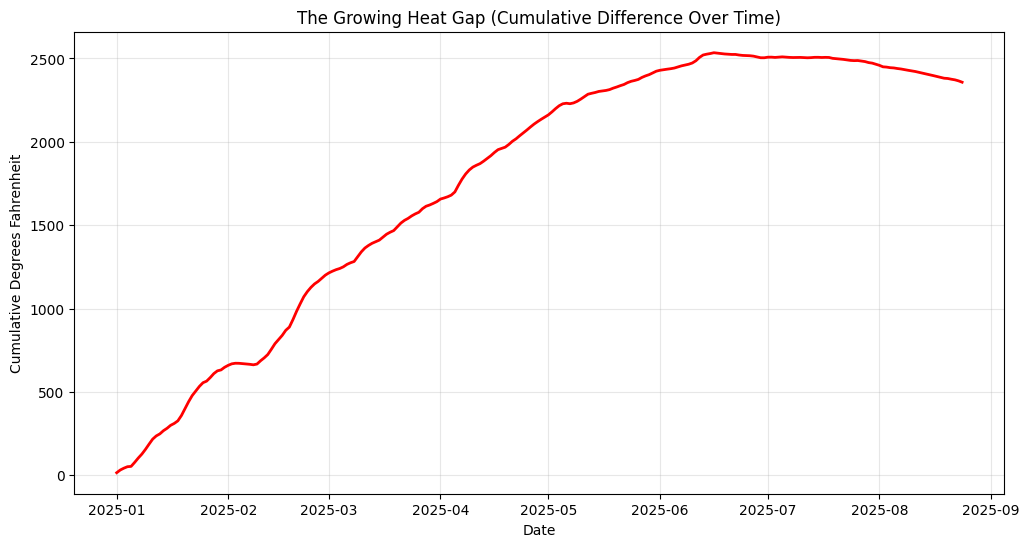

In [48]:
import numpy as np

plt.figure(figsize=(12, 6))
# np.cumsum stands for Cumulative Sum.Imagine on Day 1, Ahmedabad is 10° warmer.
# The total is 10.On Day 2, Ahmedabad is 15° warmer. The total is now 25 (10 + 15).On Day 3, Ahmedabad is 5° warmer.
# The total is now 30 (25 + 5).T
# Result: The line will almost always go up. It represents the "mountain" of extra heat you would have experienced if you had stayed in India.
plt.plot(chicago_df['date_dt'], np.cumsum(daily_diff), color='red', linewidth=2)
plt.title('The Growing Heat Gap (Cumulative Difference Over Time)')
plt.ylabel('Cumulative Degrees Fahrenheit')
plt.xlabel('Date')
plt.grid(alpha=0.3)
plt.show()